# Programming Assignment 1: Linear Regression

## Import useful library

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## 1 Simple python and numpy function

The first part of ex1.m gives you practice with python/numpy syntax and the homework submission process. You will find the outline of an python function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

In [122]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.identity(5)   # modify this line
    
    # ==============================
    return A

In [123]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

In [124]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',') # read comma separated data
X, y = data[:, 0], data[:, 1]
m = y.size # number of training examples

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

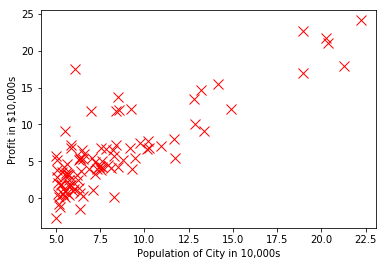

In [125]:
plt.plot(X, y, 'rx', markersize=10); # Plot the data
plt.ylabel('Profit in $10,000s'); # Set the y−axis label
plt.xlabel('Population of City in 10,000s'); # Set the x−axis label

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### 2.2.2 Implementation

In [126]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)
iterations = 1500
alpha = 0.01
theta = np.zeros(2)

#### 2.2.3 Computing the cost $J(\theta)$

In [127]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    predictions = np.dot(X, theta)
    square_error = (predictions - y)**2
    J = 1/(2*m) * np.sum(square_error) 
    
    # ===========================================================
    return J

In [137]:
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = {:.2f}'.format(J))
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = {:.2f}'.format(J))
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


#### 2.2.4 Gradient descent

In [154]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        error = np.dot(X, theta) - y
        delta = 1/m * (np.dot(np.transpose(X), error))
        theta = theta - (alpha * delta)

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [155]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


We will use your final parameters to plot the linear fit. The results should look like the following figure.

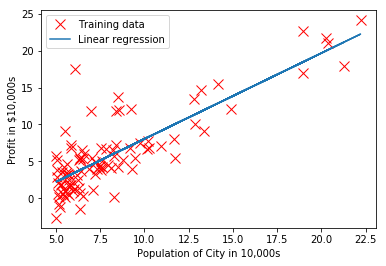

In [173]:
plt.plot(X[:, 1], y, 'rx', markersize=10)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Training data', 'Linear regression'])

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [175]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45


### 2.4 Visualizing $J(\theta)$

Text(0.5,1,'Contour, showing minimum')

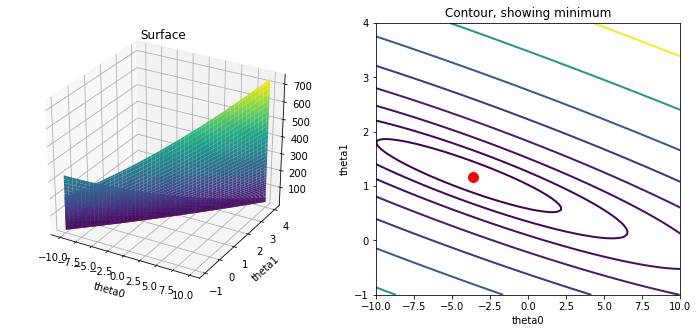

In [179]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file Data/ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [303]:
# Load data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Your task here is to complete the code in featureNormalize function

In [304]:
def  featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

Execute the next cell to run the implemented featureNormalize function.

In [306]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.94702354e+02 7.60981887e-01]


After the featureNormalize function is tested, we now add the intercept term to X_norm:

In [307]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

You should complete the code for the functions computeCostMulti and gradientDescentMulti to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too. Make sure your code supports any number of features and is well-vectorized. You can use the shape property of numpy arrays to find out how many features are present in the dataset.

In [337]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    predictions = np.dot(X, theta)
    square_error = (predictions - y)**2
    J = 1/(2*m) * np.sum(square_error)
    
    # ==================================================================
    return J

In [338]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        error = np.dot(X, theta) - y
        delta = 1/m * (np.dot(np.transpose(X), error))
        theta = theta - (alpha * delta)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

theta computed from gradient descent: [340412.65957447 110631.04895815  -6649.47295013]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


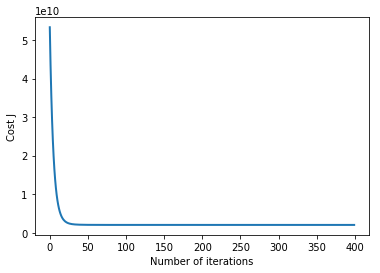

In [346]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
normalize_test_data = ((np.array([1650, 3]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = np.dot(normalize_test_data, theta) # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [348]:
# Load data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function normalEqn below to use the formula above to calculate $\theta$.

In [350]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    
    # =================================================================
    return theta

Optional (ungraded) exercise: Now, once you have found $\theta$ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent (in Section 3.2.1).

In [352]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = np.dot([1, 1650, 3], theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.90954361   139.21067402 -8738.01911255]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
